In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time
import os


logging.basicConfig(
    filename="/kaggle/working/logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

In [2]:
import os

# Create a 'logs' folder in the current working directory (usually /kaggle/working/)
if not os.path.exists('logs'):
    os.makedirs('logs')
    print("Folder 'logs' created.")
else:
    print("Folder 'logs' already exists.")


Folder 'logs' created.


In [3]:

engine = create_engine('sqlite:////kaggle/working/inventory.db')

def ingest_db(df, table_name, engine):
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)


def load_raw_data():
    start = time.time()
    for file in os.listdir('/kaggle/input/datafile'):
        if '.csv' in file:
            df = pd.read_csv('/kaggle/input/datafile/' + file)
            logging.info(f'Ingesting {file} in db')
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start)/60
    logging.info("Ingestion Completed")
    logging.info(f'Total time taken is {total_time} minutes')


In [4]:
load_raw_data()

In [5]:
import pandas as pd
import sqlite3

In [6]:
conn = sqlite3.connect('/kaggle/working/inventory.db')

In [7]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'",conn)
tables

,name
0,purchase_prices
1,vendor_invoice
2,purchases
3,begin_inventory
4,end_inventory
5,sales


In [8]:
purchases = pd.read_sql_query("select * from purchases where VendorNumber = 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [9]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber = 4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [10]:
sales = pd.read_sql_query("select * from sales where VendorNo = 4466",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [11]:
vendor_invoice = pd.read_sql_query("select * from vendor_invoice where VendorNumber = 4466",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [18]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [12]:
vendor_invoice[['PONumber']].nunique()

PONumber    55
dtype: int64

In [13]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


In [14]:
freight_summary = pd.read_sql_query(""" select VendorNumber, sum(Freight) as FreightCost from vendor_invoice group by VendorNumber""",conn)
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [22]:
pd.read_sql_query("""select p.VendorNumber, p.VendorName, p.Brand, p.PurchasePrice,pp.Volume,pp.Price as ActualPrice, SUM(p.Quantity) as TotalPurchaseQuantity,SUM(p.Dollars) as TotalPurchaseDollars FROM purchases p JOIN purchase_prices pp on p.Brand = pp.Brand  WHERE p.PurchasePrice >0 GROUP BY p.VendorName, p.VendorNumber, p.Brand ORDER BY TotalPurchaseDollars""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [15]:
query = pd.read_sql_query("""
SELECT 
    VendorNo,
    Brand,
    SUM(SalesDollars) AS TotalSalesDollars,
    SUM(SalesPrice) AS TotalSalesPrice,
    SUM(SalesQuantity) AS TotalSalesQuantity,
    SUM(ExciseTax) AS TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand
ORDER BY TotalSalesDollars
""", conn)


In [16]:
vendor_sales_summary = pd.read_sql_query("""
WITH FreightSummary AS (
    SELECT
        VendorNumber,
        SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),

PurchaseSummary AS (
    SELECT
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price,
        pp.Volume
),

SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
)

SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss ON ps.VendorNumber = ss.VendorNo AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs ON ps.VendorNumber = fs.VendorNumber
""", conn)


In [17]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [18]:
vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
ActualPrice                0
Volume                     0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       178
TotalSalesDollars        178
TotalSalesPrice          178
TotalExciseTax           178
FreightCost                0
dtype: int64

In [19]:
vendor_sales_summary['VendorName'].unique()

array(['IRA GOLDMAN AND WILLIAMS, LLP          ',
       'AAPER ALCOHOL & CHEMICAL CO', 'ADAMBA IMPORTS INTL INC    ',
       'ALTAMAR BRANDS LLC         ', 'AMERICAN SPIRITS EXCHANGE  ',
       'APPOLO VINEYARDS LLC       ', 'ATLANTIC IMPORTING COMPANY ',
       'BACARDI USA INC            ', 'BANFI PRODUCTS CORP        ',
       'STATE WINE & SPIRITS   ', 'SAZERAC NORTH AMERICA INC. ',
       'BRONCO WINE COMPANY        ', 'BROWN-FORMAN CORP          ',
       'BULLY BOY DISTILLERS       ', 'BLACK ROCK SPIRITS LLC     ',
       'CALEDONIA SPIRITS INC      ', 'CONSTELLATION BRANDS INC   ',
       'CAPSTONE INTERNATIONAL     ', 'CASTLE BRANDS CORP.        ',
       'VINEYARD BRANDS INC        ', 'VINEYARD BRANDS LLC        ',
       'DIAGEO CHATEAU ESTATE WINES', 'VRANKEN AMERICA            ',
       'Circa Wines                ', 'FABRIZIA SPIRITS LLC       ',
       'ALISA CARR BEVERAGES           ', 'SOUTHERN GLAZERS W&S OF NE ',
       'SOUTHERN WINE & SPIRITS NE ', 'DELICATO VINEY

In [20]:
vendor_sales_summary['Description'].unique()

array(['Ch Lilian 09 Ladouys St Este', 'Flavor Essence Variety 5 Pak',
       'Ethyl Alcohol 200 Proof', ..., 'Art in the Age Chicory Root',
       'Chicory Root Vodka', 'White Mountain Vodka'], dtype=object)

In [21]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

In [22]:
vendor_sales_summary.fillna(0,inplace = True)

In [23]:
vendor_sales_summary['VendorName'] = vendor_sales_summary['VendorName'].str.strip()

In [26]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [27]:
vendor_sales_summary['GrossProfit'].min()

-52002.78000000001

In [28]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars'])*100

In [29]:
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [30]:
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [32]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [33]:
cursor = conn.cursor()

In [34]:
cursor.execute("""
CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume DECIMAL(15,2),  -- Volume had no data type; added DECIMAL
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
)
""")


In [37]:
pd.read_sql_query("select * from vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,8,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,24.99,162.5,320,5440.00,24.0,599.76,449.82,0.52,27.08,-4840.24,-807.029478,0.075000,0.110250
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750.0,1,105.07,0.0,0.00,0.00,0.00,0.48,-105.07,-inf,0.000000,0.000000
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750.0,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750.0,6,66.60,0.0,0.00,0.00,0.00,367.52,-66.60,-inf,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,173357,TAMWORTH DISTILLING,2804,Camp Robber Whiskey,32.14,44.99,750.0,210,6749.40,140.0,6298.60,3194.29,110.33,202.50,-450.80,-7.157146,0.666667,0.933209
10688,173357,TAMWORTH DISTILLING,3666,Art in the Age Chicory Root,18.79,24.99,375.0,520,9770.80,360.0,8996.40,4873.05,141.19,202.50,-774.40,-8.607888,0.692308,0.920743
10689,173357,TAMWORTH DISTILLING,3848,Chicory Root Vodka,23.30,30.99,750.0,28,652.40,6.0,185.94,92.97,4.71,202.50,-466.46,-250.865871,0.214286,0.285009
10690,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,24.99,750.0,1232,23863.84,982.0,24540.18,14469.21,773.87,202.50,676.34,2.756052,0.797078,1.028342


In [36]:
vendor_sales_summary.to_sql('vendor_sales_summary',conn, if_exists = 'replace', index = False)

10692

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3

from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')


In [39]:
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,8,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,24.99,162.5,320,5440.00,24.0,599.76,449.82,0.52,27.08,-4840.24,-807.029478,0.075000,0.110250
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750.0,1,105.07,0.0,0.00,0.00,0.00,0.48,-105.07,-inf,0.000000,0.000000
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750.0,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750.0,6,66.60,0.0,0.00,0.00,0.00,367.52,-66.60,-inf,0.000000,0.000000


In [42]:
#summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


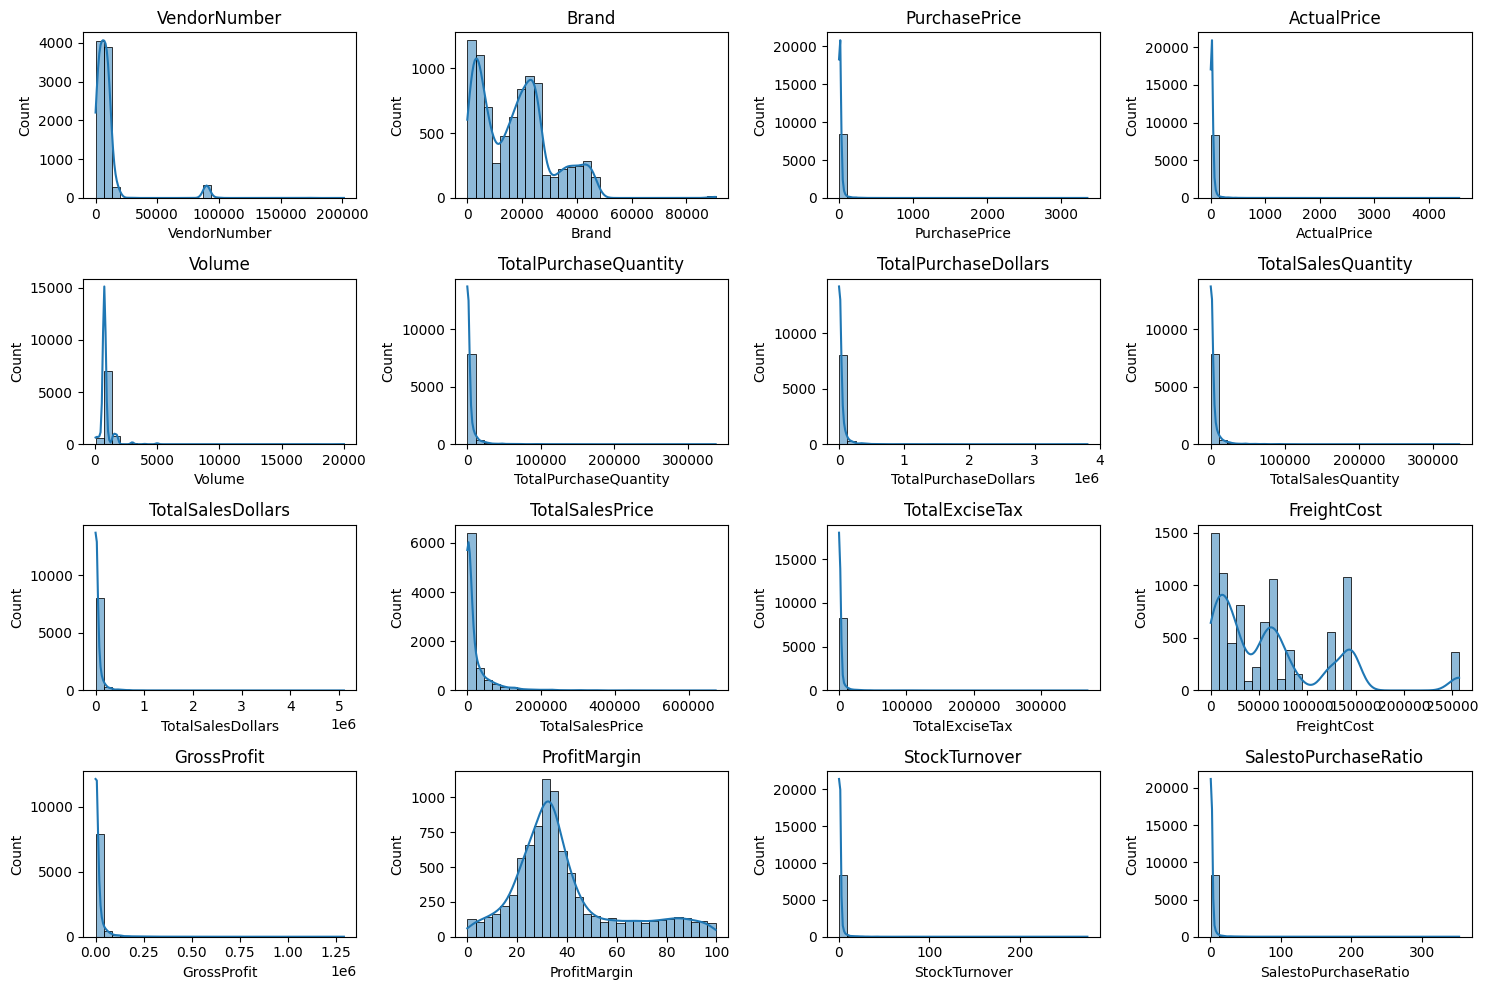

In [48]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjust the grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


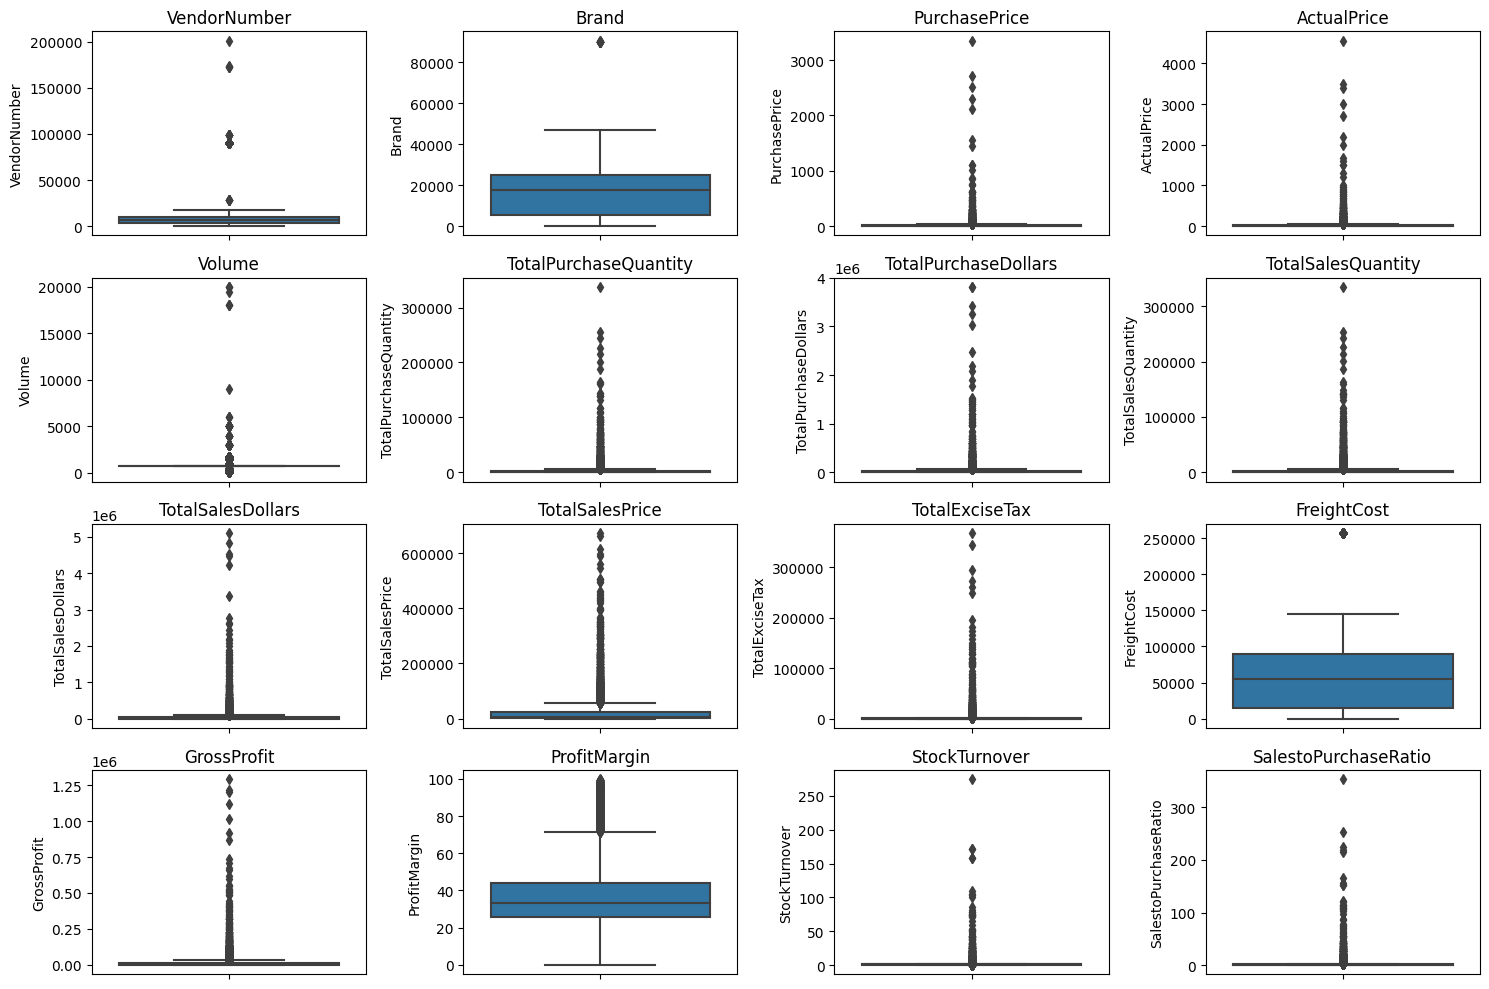

In [47]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [45]:
df = pd.read_sql_query(""" select *
from vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0 
and TotalSalesQuantity > 0""",conn)

In [46]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,8,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750.0,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,23.25,29.99,750.0,12,279.00,12.0,359.88,59.98,9.44,62.39,80.88,22.474158,1.000000,1.289892
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750.0,320,11427.20,307.0,15346.93,12947.41,242.15,62.39,3919.73,25.540808,0.959375,1.343018
4,200,AMERICAN SPIRITS EXCHANGE,20789,Zin-phomaniac Znfdl,9.73,14.99,750.0,96,934.08,84.0,1511.16,287.84,9.43,6.19,577.08,38.187882,0.875000,1.617806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,172662,SWEETWATER FARM,2191,Clark & Chesterfield Whiskey,14.70,19.99,375.0,138,2028.60,125.0,2498.75,1819.09,49.00,178.34,470.15,18.815408,0.905797,1.231761
8561,172662,SWEETWATER FARM,2265,Monadnock Moonshine,21.47,28.99,750.0,267,5732.49,222.0,6435.78,5363.15,175.13,178.34,703.29,10.927813,0.831461,1.122685
8562,172662,SWEETWATER FARM,3632,Ashuelot Vodka,21.58,28.49,750.0,554,11955.32,452.0,12877.48,8205.12,356.14,178.34,922.16,7.161028,0.815884,1.077134
8563,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,24.99,750.0,1232,23863.84,982.0,24540.18,14469.21,773.87,202.50,676.34,2.756052,0.797078,1.028342


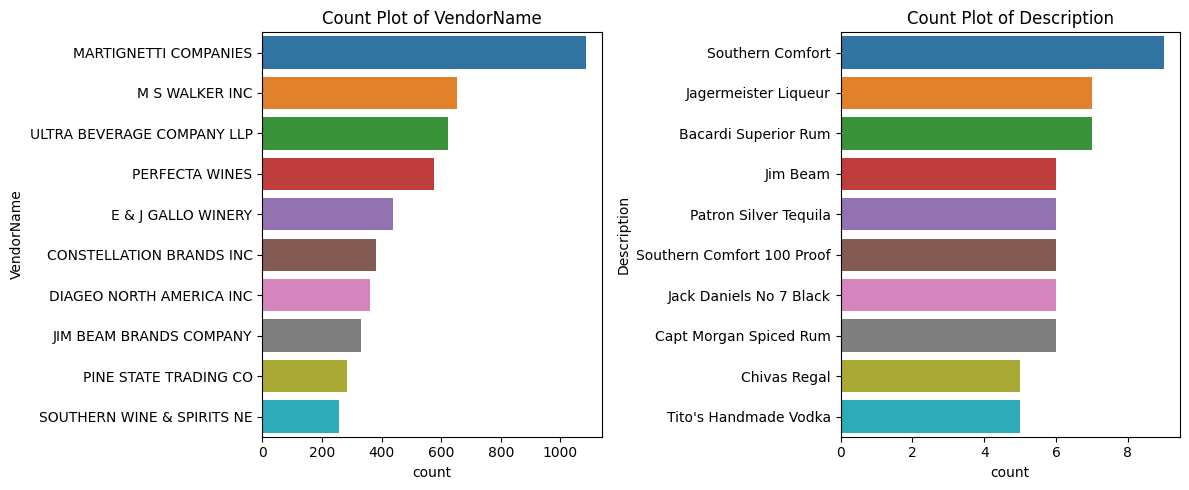

In [49]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
    
plt.tight_layout()
plt.show()


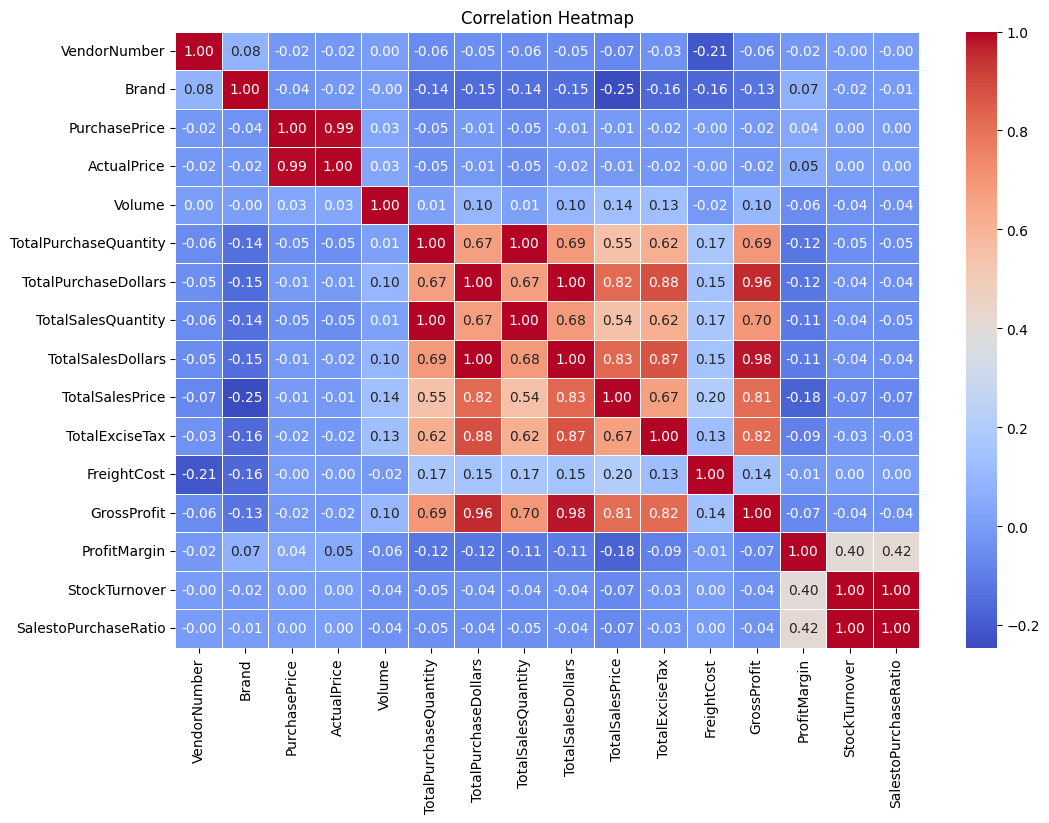

In [50]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Data analysis using the above clean data 

Identify brands that need Promotional or Pricing Adjustment which exhibts lower sales Performance but higher profit margins.

In [53]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum','ProfitMargin': 'mean'}).reset_index()

In [64]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [65]:
low_sales_threshold


560.299

In [66]:
high_margin_threshold

64.97017552750111

In [67]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [69]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

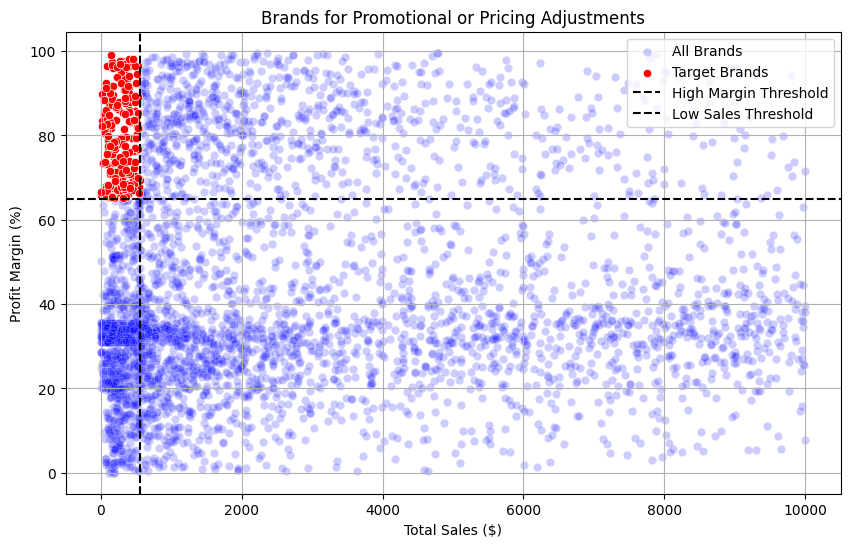

In [70]:
plt.figure(figsize=(10, 6))

# All brands (in blue)
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

# Target brands (in red)
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# Add threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

# Add plot labels and legend
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

which vendors and brand demonstarte the highest sales performance?

In [74]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)


In [72]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [75]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

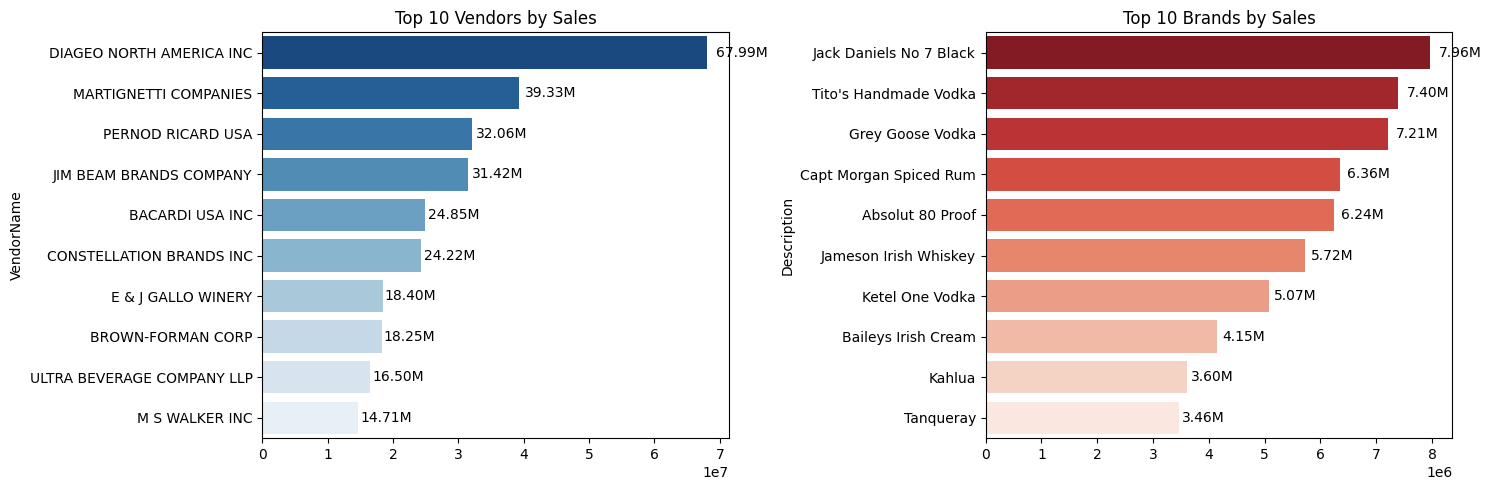

In [76]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


which vendors contribute the most to the total purchase dollars?

In [84]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
})

In [96]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [97]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending = False),2)

In [98]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors


,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
BACARDI USA INC,17.43M,7.42M,24.85M,5.67
CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63


In [99]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [100]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

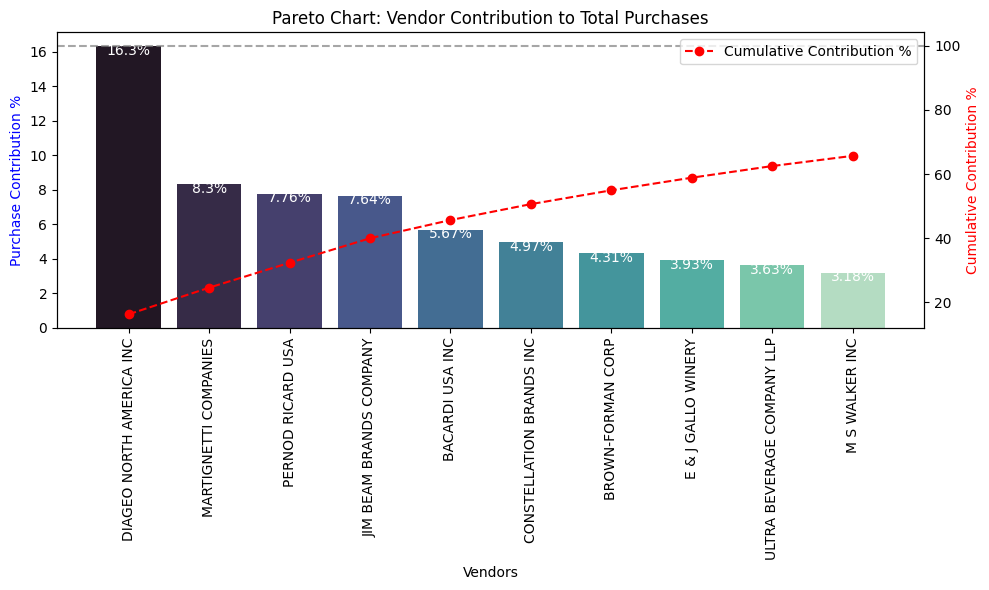

In [102]:
# Step 1: Reset index so 'VendorName' becomes a column
top_vendors = top_vendors.reset_index()

# Step 2: Pareto Chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

# Annotate bars with percentage values
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 0.5, f"{round(value, 2)}%", ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

# Format x-axis
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)

# Axis labels
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')

# Title and reference line
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

# Legend
ax2.legend(loc='upper right')

# Layout adjustment
plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?

In [105]:

print(f"Total Purchase Contribution of the top vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")


Total Purchase Contribution of the top vendors is 65.69%


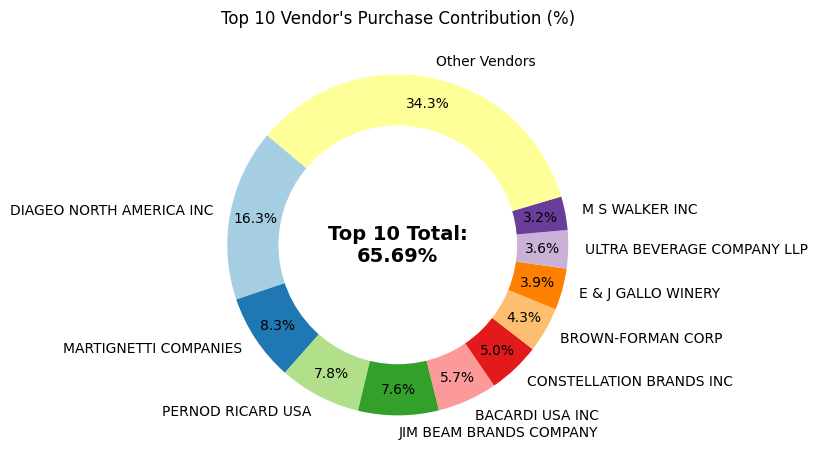

In [106]:
# Prepare vendor names and contribution data
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Calculate total and remaining contributions
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Add "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Create Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw center circle to create donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution text in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", 
         fontsize=14, fontweight='bold', ha='center', va='center')

# Title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

plt.tight_layout()
plt.show()


Does purchasing in bulk reduce the unit price, what is the optimal purchase volume for the cost savings?

In [108]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [109]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3, labels = ['Small','Medium','Large'])

In [110]:
df['OrderSize']

0        Small
1        Small
2        Small
3       Medium
4       Medium
         ...  
8560    Medium
8561    Medium
8562    Medium
8563    Medium
8564     Small
Name: OrderSize, Length: 8565, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [111]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


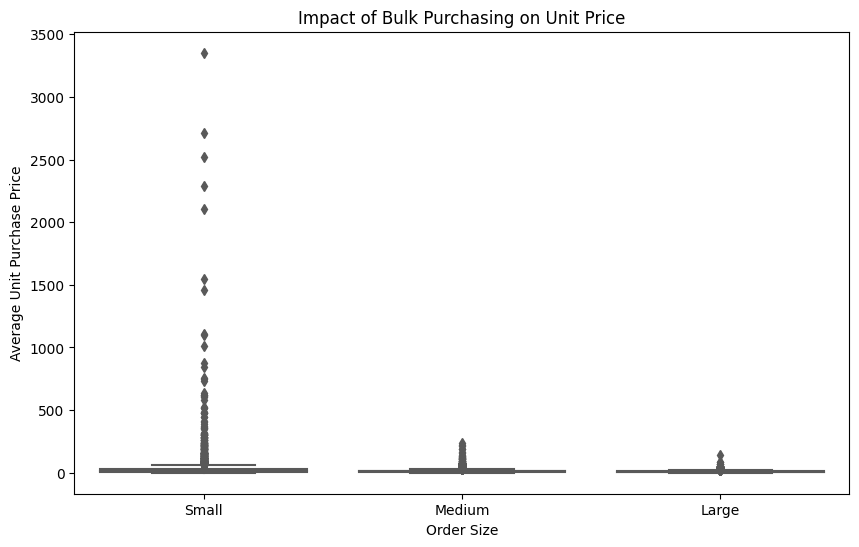

In [112]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")

plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")

plt.show()


which vendors have low inventory turnover indicating excess stock and slow maving products?


In [113]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much Capital is locked in insold inventory per vendor, and which vendor contribute the most to it?

In [119]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'] * df['PurchasePrice'])
print('Total Unsold Captals:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Captals: -272326889.81


In [120]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)

# Format values to dollar-style (e.g., $1.2M)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Display Top 10
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
107,UNCORKED,-112.74
16,CAPSTONE INTERNATIONAL,-173.58
33,FANTASY FINE WINES CORP,-195.76000000000002
85,SILVER MOUNTAIN CIDERS,-205.46
44,"IRA GOLDMAN AND WILLIAMS, LLP",-421.48
0,ADAMBA IMPORTS INTL INC,-498.67999999999995
41,HIGHLAND WINE MERCHANTS LLC,-624.37
3,AMERICAN SPIRITS EXCHANGE,-721.32
35,FLAVOR ESSENCE INC,-1002.0
9,BLACK ROCK SPIRITS LLC,-1070.1000000000001


What is the 95% confident interval for profit margins of top-performing and low vendors?

In [121]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [122]:
top_vendors = df[df['TotalSalesDollars']>= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<= top_threshold]['ProfitMargin'].dropna()

In [123]:
top_vendors

5       16.999601
8       30.557678
13      30.827478
14      27.129385
17      24.329082
          ...    
8537    25.173464
8538    22.886164
8539    22.652408
8553    27.103538
8555    28.056879
Name: ProfitMargin, Length: 2142, dtype: float64

In [124]:
low_vendors

0       71.331591
1       36.672675
2       22.474158
3       25.540808
4       38.187882
          ...    
8560    18.815408
8561    10.927813
8562     7.161028
8563     2.756052
8564    98.846996
Name: ProfitMargin, Length: 6424, dtype: float64

In [128]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.66, 41.80), Mean: 41.23


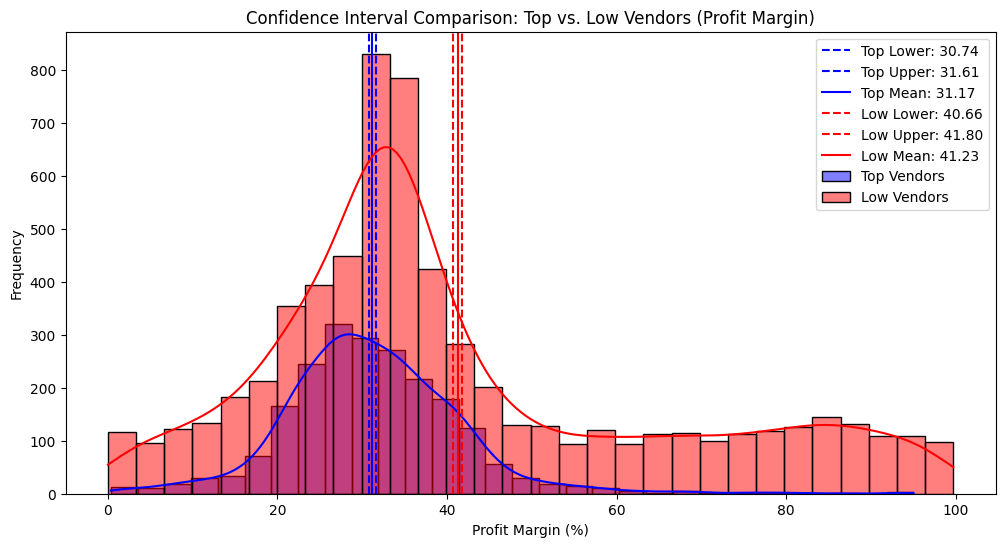

In [129]:
# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print summary
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot settings
plt.figure(figsize=(12, 6))

# Top Vendors Histogram
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,  color="blue", linestyle="-",  label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Histogram
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,  color="red", linestyle="-",  label=f"Low Mean: {low_mean:.2f}")

# Finalize plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Is there a significant different in profit margins between top - performing and low- performing vendor ?

h0 (null hypothesis): There is no different in the mean profit margins of top-performer and low performer vendors
h1 (Alternatve Hypothesis): The ean profit margins of top-performing and low -performing vendors are significanty differet

In [130]:
from scipy.stats import ttest_ind

# Define thresholds based on Total Sales Dollars
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Split data into top and low vendors based on profit margin
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: -17.6440, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
